In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import re

## 🖋 Reading Datasets

In [2]:
movies = pd.read_csv("Datasets/movies.csv")
ratings = pd.read_csv("Datasets/ratings.csv")

In [48]:
movies.head()

,movieId,title,genres,Year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


## 🎇 Feature Engineering in Movies Dataset 
- extract Year of movie production as separated Feature by `Extract_Year`
- removing **`()`** from the Column by `Clean_title()`

In [3]:
def Extract_Year(String:str):
    try:
        return int(re.findall(pattern=r"(\d+)",string=String)[0])
    except IndexError: 
        return 0

In [4]:
def clean_title(String:str):
        return re.sub(pattern=r"[(\d+)]",repl="",string=String)

In [5]:
movies["Year"] = movies.apply(lambda x:Extract_Year(x["title"]),axis=1)

In [6]:
movies["title"] = movies.apply(lambda x:clean_title(x["title"]),axis=1)

## 🟢 Movies dataset after Feature Engineering

In [7]:
movies.head()

,movieId,title,genres,Year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


## 💾 Save the Dataset after Update 

In [8]:
movies.to_csv("CleanedMovies.csv",index=False)

In [50]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


## 🛠 Model Building

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
tfidf = TfidfVectorizer(stop_words="english")
movies_vectors= tfidf.fit_transform(movies["genres"])

In [12]:
movies_vectors.shape

(62423, 23)

In [13]:
Movies_similarities = cosine_similarity(movies_vectors,movies_vectors)

## 👀 Recommend Movie Function based on user

In [ ]:
def Recommend_Movie(user_id:int,Movies_similarities:np.ndarray,ratings:pd.DataFrame,movies:pd.DataFrame):

    #! Get watched Movies by user ID and rating larger >= 3  
    favorite_Movie = ratings[(ratings["userId"] == user_id) & (ratings["rating"]>=3)]["movieId"].values

    #! Sum similarity Matrix column to get similarity score for each movies to the watched movies 
    #! Movies_similarities[favorite_Movie - 1].shape = (60, 62423)
    similar_scores = np.sum(Movies_similarities[favorite_Movie - 1],axis=0) 

    #! Sorting similarity array to get most relevant content for watched Movies
    recommended_destinations_idx = np.argsort(similar_scores)[::-1]

    recommends = []
    for idx in recommended_destinations_idx:
        if movies.iloc[idx]["movieId"] not in favorite_Movie:
            recommends.append(movies.iloc[idx])
        if len(recommends) >= 10:
            break
    
    return pd.DataFrame(recommends)

## 💹 User Favourite Movies Categories Graph Function

In [ ]:
def get_Most_favorite_types(user_id:int):

    most = []
    favorite_Movie = ratings[(ratings["userId"] == user_id) & (ratings["rating"] >= 3)]["movieId"]

    for movie_id in favorite_Movie:
        most.extend(movies.iloc[movie_id]["genres"].split("|"))

    sns.set_theme(style="whitegrid",context="talk",font_scale=1.1)
    plt.figure(figsize=(18, 12))

    ax = sns.countplot(x=most,order=pd.Series(most).value_counts().index,palette="viridis",legend=False,hue=most)

    ax.set_title(f"Top Watched Catagory by User id ={user_id}",fontsize=22,weight="bold",pad=20)

    ax.set_xlabel("Catagories", fontsize=16)
    ax.set_ylabel("Catagory Count", fontsize=16)

    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f", padding=6, fontsize=13,weight="bold")
    plt.grid(visible=False)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()


## ✅ Inference

In [46]:
user_id = 1
Recommend_Movie(user_id=user_id,Movies_similarities=Movies_similarities,ratings=ratings,movies=movies)

(62423,)


,movieId,title,genres,Year
491,496,What Happened Was...,Comedy|Drama|Romance|Thriller,1994
33298,142839,Vaaranam Aayiram,Comedy|Drama|Romance|Thriller,2008
5555,5666,"Rules of Attraction, The",Comedy|Drama|Romance|Thriller,2002
37414,152593,Bhagam Bhag,Comedy|Drama|Romance|Thriller,2006
50012,180089,Showgirls : Penny's from Heaven,Comedy|Drama|Romance|Thriller,2
22219,113949,Aaron Loves Angela,Comedy|Drama|Romance|Thriller,1975
15531,81804,Wild Target,Comedy|Drama|Romance|Thriller,2010
15598,82119,The Reverse,Comedy|Drama|Romance|Thriller,2009
15949,84176,Waxworks Das Wachsfigurenkabinett,Comedy|Drama|Romance|Thriller,1924
39,40,"Cry, the Beloved Country",Drama,1995


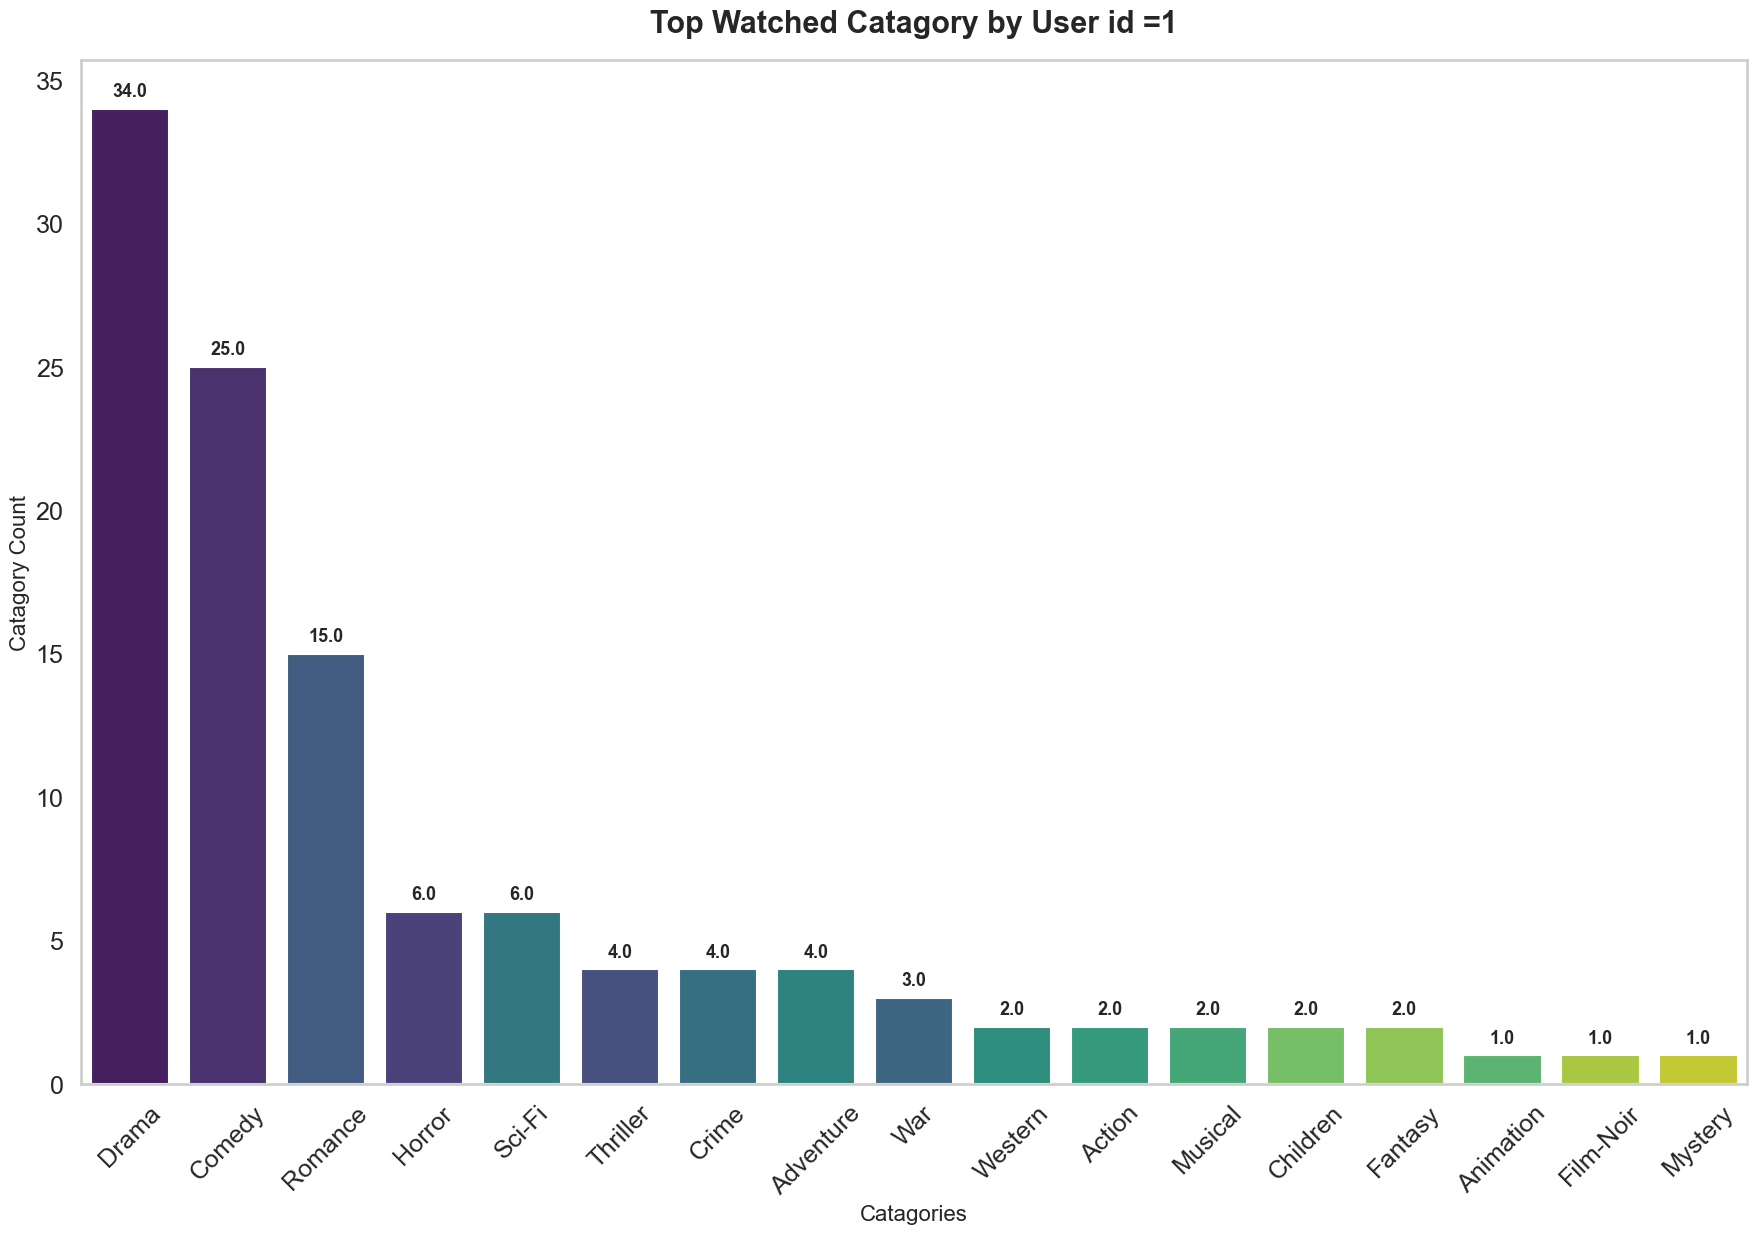

In [47]:
get_Most_favorite_types(user_id=user_id)

---

<h1 align="center">The End of model 😎</h1>


---
